# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент гр. 9381 Птичкин Сергей, вариант 60.

## Цель работы

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения

#### Бинарный метод

Бинарный метод - это один из алгоритмов быстрого возведения числа $x$ в некоторую степень $n\in \mathbb{N}$.

Алгоритм заключается в следующем: для начала числа $x$ представляется в двоичном виде, после чего из этого двоичного представления удаляется старший бит (единица). Далее в цикле просматриваются биты от старшего к младшему: на каждой итерации $x$ умножается на себя, при этом если очередной бит числа равен 1, то к результату произведения прибавляется $x$. 

Количество операций, требуемых для возведения числа $x$ в степень $n$, для данного метода равно $\lambda(n)+\nu(n)-1$, где $\lambda(n)=\lceil log_2(n) \rceil$, а $\nu(n)$ равно количеству единиц в двоичной записи числа $n$.

#### Метод множителей

Метод множителей  это один из алгоритмов быстрого возведения числа $x$ в некоторую степень $n\in \mathbb{N}$.

Алгоритм заключается в следующем: для начала производится поиск минимального простого делителя числа $n$ ($n=i \cdot j$), где $i$ - минимальный простой делитель числа $n$). Далее при помощи бинарного метода число &x& возводится в степень $i$, после чего полученный результат $x^i=y$ возводится в степень $j$: $y^j={(x^i)}^j=x^{i\cdot j}=x^n$. Если $n$ - простое число, то алгоритм сначала возводит число $x$ в степень $n-1$, а потом домножает на $x$, получая тем самым $x^n$.

Количество операций, требуемых для возведения числа $x$ в степень $n$, для данного метода равно $\lambda(i)+\nu(i)+\lambda(j)+\nu(j)-2$ (в случае, если число не простое), иначе - $\lambda(n-1)+\nu(n-1)$

#### Аддитивные цепочки

Аддитивная цепочка для некоторого числа $n\in \mathbb{N}$ - это последовательность натуральных чисел $\{a_i\}_{i=0}^m$, начинающаяся с единицы, в которой каждый последующий элемент является суммой каких-то двух предшествующих элементов. Данная последовательность удовлетворяет следующим свойствам:
1. $a_0 = 1$;
2. $\forall i > 0: a_i = a_j + a_k$, где $j, k < i$.

Длина аддитивной цепочки $l(n)=|\{a_i\}_{i=0}^m|$, где $a_m = n$.

$a_i=a_j+a_k$ - шаг аддитивной цепочки, $i \in \{1,2 \dots m\}$, $0\leqslant k\leqslant j < i$

Типы шагов в аддитивной цепочке:
1. Шаг i называют удвоением, если $i - 1 = k = j$;
2. Шаг i называют звездным, если $j = i - 1$, $k \in \{0, \dots, i-1\}$;
3. Шаг i называют малым, если $\lambda(a_i)=\lambda(a_{i-1})$

Звездная цепочка - это аддитивная цепочка, в которая состоит только из звездных шагов.

#### Алгоритм Яо

Алгоритм Яо позволяет найти аддитивную цепочку для некоторого числа $n \in \mathbb{N}$. Для начала фиксируются переменные $n,k \geq 2$, после чего $n$ представляется в виде $\sum_{i=0} a_i \cdot 2^{ik}$, где $a_j \neq 0$. 

Далее вводится функция $d(z)=\sum_{\forall i: a_i=z} 2^{ik}$.

В начало аддитивной цепочки Яо добавляются степени двойки: $Y_k(n): 1,2,4,\dots ,2^{\lambda(n)}$, после чего вычисляются все значения $d(z)$, где $z \in \{1,2,3, \dots ,2^k-1 \}$ и $d(z) \neq 0$.

В таком случае число $n=\sum_{z=1}^{2^k-1}z \cdot d(z)$.

#### Алгоритм дробления вектора индексов 

Алгоритм дробления вектора индексов позволяет найти минимальную звездную цепочку для некоторого числа $n \in \mathbb{N}$. 

Рассмотрим вектор индексов $\{r_i\}_{i=1}^q \cup {\{{\rho}_j \}}_{j=q+1}^m$, где ${\rho}_j= \{x: 1 \leq x \leq j \}$, ${\{r_i\}}_{i=1}^q$ - фиксированная часть, ${\{{\rho}_j\}}_{j=q+1}^m$ - изменяющаяся часть.

Наибольшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1,q+2,\dots,m\}$.

Наименьшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q}\cup\{1,1,\dots,1\}$.

$a_{max} = a_{q+1} \cdot {2}^{m-q}$

$a_{min} = a_{q+1}+m-q$

Алгоритм:
1. Во внешнем цикле рассматриваем аддитивные цепочки длины $m$ от значения $\bar{l}(n)=\lceil log_2(n) \rceil$ до $\underline{l}(n)=\lambda(n)+\nu(n)-1$, на каждой итерации выбираем $q$ ($1 \leq q \leq m-1$);
2. Далее перебираем все возможные фиксированные части вектора индексов $\{r_i\}_{i=1}^q$ ($q!$ вариантов), для каждой строим соответствующую ей звездную цепочку, находим $a_{max}$ и ${a}_{min}$, после чего:
 1. Если $n \notin [a_{min},a_{max}]$, то переходим к следующему набору $\{r_i\}_{i=1}^q$;
 2. Если $n\in [a_{min},a_{max}]$, то перебираем все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ и находим $a_m$:
  1. Если $a_m=n$, то цепочка найдена;
  2. Если все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ исчерпаны, то переходим к следующему набору $\{r_i\}_{i=1}^q$;
3. Если все наборы вектора индексов длины $m$ исчерпаны, то увеличиваем $m$ на 1.

#### Теорема Брауэра

Для некоторого $k<log_2(log_2(n))$ верно: $l(n)<(1+k^{-1}) \cdot \lceil log_2(n) \rceil +2^{k-1}-k+2$

При $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$ верны следующие следствия:
1. $\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)}=1$
2. Наилучшая верхняя оценка для длины аддитивной цепочки: $\lambda(n)(1+\frac{1}{\lambda(\lambda(n))}+\frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n))^2})$

#### Гипотеза Шольца-Брауэра
Пусть $l^*(n)$ - длина некоторой звёздной цепочки.

Тогда для любого $n \in \mathbb{N}$ верно: $l^*(2^n-1)\leq l^*(n)+n-1$

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы
1. Применить бинарный метод и метод множителей для $x^n$, где $n⩾30$, для 2-3 значений $n$ (значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1<n⩽10$ на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Выполнение работы

### 1. Бинарный метод и метод множителей.

Возьмём $n = 31, 33, 35, 63, 65$

#### Возведение числа $x$ в степень $n=31$:

**Бинарный метод:**

$31_{10} = 11111_2$

$x,\ x\cdot x = x^2,\ x^2\cdot x = x^3,\ x^3\cdot x^3 = x^6,\ x^6\cdot x = x^7,\ x^7\cdot x^7 = x^{14},\  x^{14}\cdot x = x^{15},\  x^{15}\cdot x^{15} = x^{30},\  x^{30}\cdot x = x^{31}$.

Количество операций: $\lambda (31) + \nu(31) - 1 = 4 + 5 - 1 = 8$

**Метод множителей:**

$x^{31} = x^{30}\cdot x$

$30 = 3\cdot 10$.

$x^{30} = {(x^3)}^{10}$

$x,\ x\cdot x = x^2,\ x^2\cdot x = x^3,\ x^3=y$

$y,\ y\cdot y = y^2,\ y^2\cdot y^2 = y^4,\ y^4\cdot y = y^5,\ y^5\cdot y^5 = y^{10}$

$y^{10}\cdot x = x^{31}$

_Количество операций:_ 8

#### Возведение числа $x$ в степень $n=33$:

**Бинарный метод:**

$33_{10} = 100001_2$

$x,\ x\cdot x = x^2,\ x^2\cdot x^2 = x^4,\ x^4\cdot x^4 = x^8,\ x^8\cdot x^8 = x^{16},\ x^{16}\cdot x^{16} = x^{32},\  x^{32}\cdot x = x^{33}$.

_Количество операций:_ $\lambda (33)+ \nu(33) - 1 = 5+2-1 = 6$

**Метод множителей:**

$33 = 3\cdot 11$.

$x^{33} = {(x^3)}^{11}$

$x,\ x\cdot x = x^2,\ x^2\cdot x = x^3,\ x^3=y$

$y,\ y\cdot y = y^2,\ y^2\cdot y^2 = y^4,\ y^4\cdot y = y^5,\ y^5\cdot y^5 = y^{10},\ y^{10}\cdot y = y^{11}$

_Количество операций:_ 7

#### Возведение числа $x$ в степень $n=35$:

**Бинарный метод:**

$35_{10} = 100011_2$

$x,\ x\cdot x = x^2,\ x^2\cdot x^2 = x^4,\ x^4\cdot x^4 = x^8,\ x^8\cdot x^8 = x^{16},\ x^{16}\cdot x = x^{17},\  x^{17}\cdot x^{17} = x^{34},\ x^{34}\cdot x = x^{35}$

_Количество операций:_ $\lambda (35)+ \nu(35) - 1 = 5+3-1 = 7$

**Метод множителей:**

$35 = 5\cdot 7$.

$x^{35} = {(x^5)}^7$

$x,\ x\cdot x = x^2,\ x^2\cdot x^2 = x^4,\ x^4\cdot x = x^5,\ x^5=y$

$y,\ y\cdot y = y^2,\ y^2\cdot y = y^3,\ y^3\cdot y^3 = y^6,\ y^6\cdot y = y^7$

_Количество операций:_ 7

#### Возведение числа $x$ в степень $n=63$:

**Бинарный метод:**

$63_{10} = 111111_2$

$x,\ x\cdot x = x^2,\ x^2\cdot x = x^3,\ x^3\cdot x^3 = x^6,\ x^6\cdot x = x^7,\ x^7\cdot x^7 = x^{14},\ x^{14}\cdot x = x^{15},\ x^{15}\cdot x^{15} = x^{30},\ x^{30}\cdot x = x^{31},\ x^{31}\cdot x^{31} = x^{62},\ x^{62}\cdot x = x^{63}$

_Количество операций:_ $\lambda (63)+ \nu(63) - 1 = 5+6-1 = 10$

**Метод множителей:**

$63 = 7\cdot 9$.

$x^{63} = {(x^7)}^{9}$

$x,\ x\cdot x = x^2,\ x^2\cdot x = x^3,\ x^3\cdot x^3 = x^6,\ x^6\cdot x = x^7,\ x^7=y$

$y,\ y\cdot y = y^2,\ y^2\cdot y^2 = y^4,\ y^4\cdot y^4 = y^8,\ y^8\cdot y = y^9$

_Количество операций:_ 8

#### Возведение числа $x$ в степень $n=65$:

**Бинарный метод:**

$65_{10} = 1000001_2$

$x,\ x\cdot x = x^2,\ x^2\cdot x^2 = x^4,\ x^4\cdot x^4 = x^8,\ x^8\cdot x^8 = x^{16},\ x^{16}\cdot x^{16} = x^{32},\  x^{32}\cdot x^{32} = x^{64},\  x^{64}\cdot x = x^{65}$.

_Количество операций:_ $\lambda (65)+ \nu(65) - 1 = 6+2-1 = 7$

**Метод множителей:**

$65 = 5\cdot 13$.

$x^{65} = {(x^5)}^{13}$

$x,\ x\cdot x = x^2,\ x^2\cdot x^2 = x^4,\ x^4\cdot x = x^5,\ x^5=y$

$y,\ y\cdot y = y^2,\ y^2\cdot y = y^3,\ y^3\cdot y^3 = y^6,\ y^6\cdot y^6 = y^{12},\ y^{12}\cdot y = y^{13}$

_Количество операций:_ 8

#### Результаты возведения в степень:

|n|Число операций БМ|Число операций ММ|
|:-:|:-:|:-:|
|31|8|8|
|33|6|7|
|35|7|7|
|63|10|8|
|65|7|8|

#### Вывод:

Исследование показало, что при $n = 2^k-1$ метод множителей в некоторых случаях эффективнее бинарного метода. Однако при $n = 2^k+1$ бинарный метод превосходит метод множителей. В остальных случаях оба метода работают одинаково эффективно.

### Алгоритм Яо
Реализуем алгоритм Яо для вычисления приближённых аддитивных цепочек:

In [3]:
def decomposition(n, k):
    decom = []
    while(n>0):
        decom.append(n % (2^k))
        n = n // 2^k
    return decom
def d(chain, decom, z, k):
    res = 0
    for i in range(len(decom)):
        if decom[i] == z:
            res += 2^(i*k)
            if res not in chain:
                chain.append(res)
    return res
def zd(chain, dz, z):
    binary  = decomposition(z, 1)
    zdz = dz
    for i in range(len(binary)-2, -1, -1):
        if binary[i] == 0:
            zdz += zdz
            if zdz not in chain:
                chain.append(zdz)
        else:
            zdz += zdz
            if zdz not in chain:
                chain.append(zdz)
            zdz += dz
            if zdz not in chain:
                chain.append(zdz)
    return zdz
def yao_metod(n, k):
    chain = []
    s = 1
    while(s<n):
        chain.append(s)
        s= s*2
    decom = decomposition(n,k)
    zdz_sum = 0
    for z in range(1, 2^k, 1):
        if z in decom:
            dz = d(chain, decom, z, k)
            zdz = zd(chain, dz, z)
            zdz_sum += zdz
            if zdz_sum not in chain:
                chain.append(zdz_sum)
    return chain
n = int(input("Введите n: "))
k = int(input("Введите k: "))
ch = yao_metod(n, k)
print(ch)
print("Длина аддитивной цепочки: ", len(ch))

Введите n: 244
Введите k: 4
[1, 2, 4, 8, 16, 32, 64, 128, 48, 96, 112, 224, 240, 244]
Длина аддитивной цепочки:  14


Алгоритм был применён к следующим числам: $47, 121, 244$ при разных значениях k

Результаты проведённых тестов представлены в таблице:

|N|K|Цепочка Яо|Длина цепочки|Минимальная длина
|:-:|:-:|:-:|:-:|:-:|
|47|2|[1, 2, 4, 8, 16, 32, 5, 10, 15, 47]|10|9|
|47|3|[1, 2, 4, 8, 16, 32, 40, 3, 6, 7, 47]|11|9|
|121|2|[1, 2, 4, 8, 16, 32, 64, 65, 73, 48, 121]|11|10|
|121|3|[1, 2, 4, 8, 16, 32, 64, 65, 24, 48, 56, 121]|12|10|
|244|2|[1, 2, 4, 8, 16, 32, 64, 128, 80, 160, 240, 244]|12|11|
|244|3|[1, 2, 4, 8, 16, 32, 64, 128, 192, 196, 24, 48, 244]|13|11|
|244|4|[1, 2, 4, 8, 16, 32, 64, 128, 48, 96, 112, 224, 240, 244]|14|11|

#### Вывод
Полученные алгоритмом Яо аддитивные цепочки не являются минимальными, но при определенных k их длинна близка к минимальной.

### Алгоритм дробления вектора индексов
Реализуем алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа:

In [8]:
import math
def wt_Haming(n):
    binary  = decomposition(n, 1)
    res = 0
    for i in range(len(binary)):
        if binary[i] == 1:
            res+=1
    return res
def check_is_smaller(r, start, end):
    for i in range(start, end):
        if r[i]!= 1:
            return false
    return true
def reduse_part_vec(r, end):
    while r[end]==1:
        r[end] = end+1
        end-=1
    r[end]-=1
    return r
def build_star_chain(r, m):
    star_chain = [1]
    for i in range(0, m):
        star_chain.append(star_chain[i]+star_chain[r[i]-1])
    return star_chain
def split_vec_index(n):
    min_len = math.ceil(math.log(n,2))
    max_len = math.floor(math.log(n,2)) + wt_Haming(n) - 1
    if min_len == 0:
        return [1]
    if max_len == 0:
        return [1]
    star_chain = []
    for m in range(min_len, max_len+1, 1):
        q = m//2
        if q == 0:
            q = 1
        r = []
        for i in range(1, m+1):
            r.append(i)
        r[q-1] += 1
        while not check_is_smaller(r,0, q):
            r = reduse_part_vec(r, q-1)
            star_chain = build_star_chain(r, m)
            if star_chain[-1] == n:
                return star_chain
            a_min = star_chain[q] + m -q
            a_max = star_chain[q]*2^(m-q)
            if n<a_min | n>a_max:
                continue
            r[-1]+=1
            while not check_is_smaller(r,q, m):
                r = reduse_part_vec(r, m-1)
                star_chain = build_star_chain(r, m)
                if star_chain[-1] == n:
                    return star_chain
            for j in range(q,m):
                r[j] = j+1
    return star_chain
import time
start = time.time()
n = int(input("Введите n: "))
s = split_vec_index(n)
end = time.time()
print(round(end - start, 3))
print(s)
print("Длина аддитивной цепочки: ", len(s))

Введите n: 512
4.095
[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
Длина аддитивной цепочки:  10


Алгоритм был применён к следующим числам: $501, 520, 555, 627$

Результаты проведённых тестов представлен в таблице:

|N|Время(сек)|Звёздная цепочка|Длина цепочки|Минимальная длина
|:-:|:-:|:-:|:-:|:-:|
|501|372.03|[1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501]|13|13|
|520|2.02|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 520]|11|11|
|555|329.773|[1, 2, 4, 8, 16, 32, 64, 72, 136, 137, 209, 418, 555]|13|13|
|627|669.374|[1, 2, 4, 8, 16, 32, 64, 128, 192, 208, 209, 418, 627]|13|13|

#### Вывод
Алгоритм дробления вектора индексов занимает большее время,чем остальные методы, для некоторых значений n вычисления происходят больше 10 минут. Но в результате алгоритм всегда выдаёт минимальную АЦ.

### Проверка 1-ого следствия теоремы Брауэра

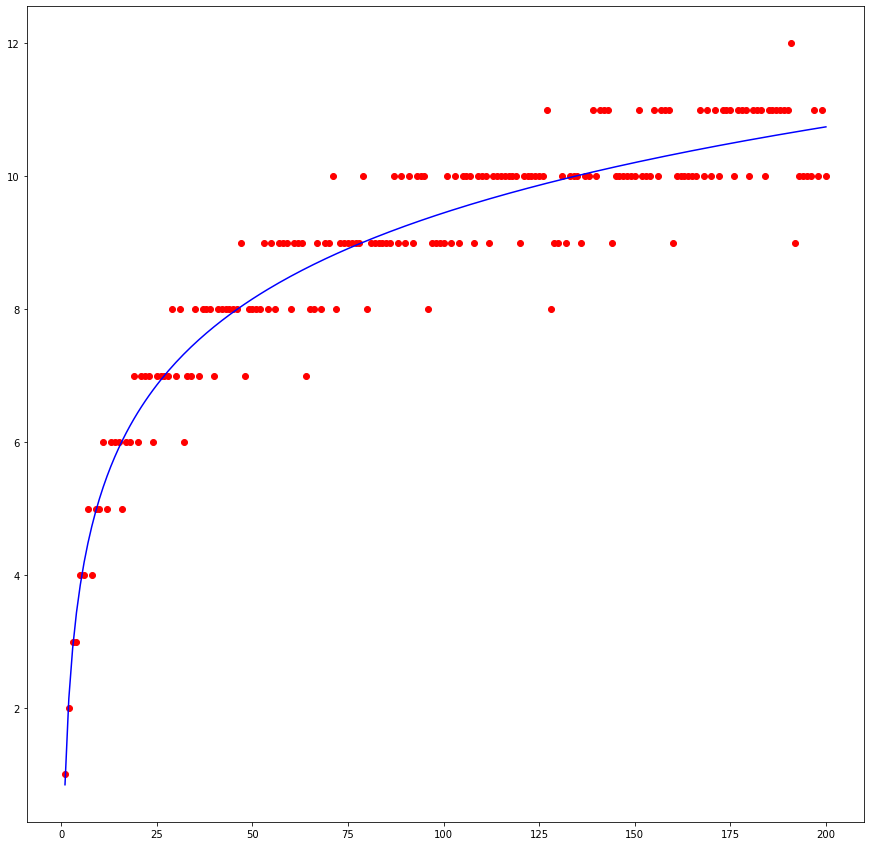

In [7]:
import pylab as plt
n=[]
l=[]
for i in range(1,201):
    n.append(i)
    l.append(len(split_vec_index(i)))
plt.figure(figsize=(15, 15))
plt.scatter(n, l, color='r', marker='o')
m = matrix([[sum([float((log(i)**2)) for i in n]), sum([float(log(i)) for i in n])], [sum([float(log(i)) for i in n]), len(n)]])
vec = vector([sum([float(l[i] * log(n[i])) for i in range(len(n))]), sum(l)])
solution = m.solve_right(vec)
plt.plot(n, [solution[0] * log(i) + solution[1] for i in n], color = 'b')
plt.show()

По графику видно, что множество значений минимальных длин аддитивных цепочек $l(n)$ при $1 \leq n \leq 200$ аппроксимируется логарифмической кривой. Это подтверждает первое следствие теоремы Брауэра: $\lim\limits_{n\to\infty} \cfrac{l(n)}{\lambda(n)}=1$, которое означает, что с увеличением $n$ длина минимальной аддитивной цепочки будет увеличиваться как логарифмическая функция.

### Проверка гипотезы Шольца–Брауэра

Проверим гипотезу Шольца–Брауэра для $1<n⩽10$ на алгоритме дробления вектора индексов:

In [41]:
for i in range(2, 11):
    print("n = {}, {} <= {}".format(i, len(split_vec_index(2**i -  1)), len(split_vec_index(i))+i-1))
          

n = 2, 3 <= 3
n = 3, 5 <= 5
n = 4, 6 <= 6
n = 5, 8 <= 8
n = 6, 9 <= 9
n = 7, 11 <= 11
n = 8, 11 <= 11
n = 9, 13 <= 13
n = 10, 14 <= 14


| $n$ | $l^*(2^n-1)$ | $l^*(n)+n-1$ |
|:---:|:------------:|:----------:|
|2 |3|3|
|3 |5|5|
|4 |6|6|
|5 |8|8|
|6 |9|9|
|7 |11|11|
|8 |11|11|
|9 |13|13|
|10|14|14|

#### Вывод
Из полученных данных видно что, гипотеза Шольца-Брауэра справедлива для $n \leq 10$.

## Выводы

В ходе выполнения практической работы были сформированы представления об аддитивных цепочках, получен навык использования систем компьютерной алгебры для реализации алгоритмов. Были реализованы и проанализированы следующие алгоритмы формирования аддитивных цепочек:
* Бинарный метод 
* Метод множителей
* Алгоритм Яо
* Алгоритм дробления вектора индексов.

Помимо этого были проверены первое следствие теоремы Брауэра и гипотеза Шольца–Брауэра для $1 < n \leq 10$.